In [70]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

import joblib

In [71]:
df=pd.read_csv("titanic.csv")
df.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [72]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [74]:
df.keys()

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [75]:
X=df.drop(columns=["survived", "name", "ticket", "cabin", "boat", "body"])
y=df["survived"]
X

,pclass,sex,age,sibsp,parch,fare,embarked,home.dest
0,1,female,29.00,0,0,211.3375,S,"St Louis, MO"
1,1,male,0.92,1,2,151.5500,S,"Montreal, PQ / Chesterville, ON"
2,1,female,2.00,1,2,151.5500,S,"Montreal, PQ / Chesterville, ON"
3,1,male,30.00,1,2,151.5500,S,"Montreal, PQ / Chesterville, ON"
4,1,female,25.00,1,2,151.5500,S,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...
1304,3,female,14.50,1,0,14.4542,C,NaN
1305,3,female,NaN,1,0,14.4542,C,NaN
1306,3,male,26.50,0,0,7.2250,C,NaN
1307,3,male,27.00,0,0,7.2250,C,NaN


In [76]:
X.head()

,pclass,sex,age,sibsp,parch,fare,embarked,home.dest
0,1,female,29.00,0,0,211.3375,S,"St Louis, MO"
1,1,male,0.92,1,2,151.5500,S,"Montreal, PQ / Chesterville, ON"
2,1,female,2.00,1,2,151.5500,S,"Montreal, PQ / Chesterville, ON"
3,1,male,30.00,1,2,151.5500,S,"Montreal, PQ / Chesterville, ON"
4,1,female,25.00,1,2,151.5500,S,"Montreal, PQ / Chesterville, ON"


In [77]:
numeric_features=["age", "fare", "sibsp", "parch"]
categorical_features=["sex", "embarked", "home.dest"]

In [78]:
numeric_transformer=Pipeline(steps=[
    ("saler", StandardScaler())
])

categorical_transformer=Pipeline(steps=[
    ("onehot", pd.get_dummies)
])

In [79]:
X["age"] = X["age"].fillna(X["age"].median())
X["embarked"] = X["embarked"].fillna(X["embarked"].mode()[0])
X["home.dest"] = X["home.dest"].fillna("Unknown")
X["fare"] = X["fare"].fillna(X["fare"].median())


In [80]:
X=pd.get_dummies(X, columns=categorical_features, drop_first=True)

scaler=StandardScaler()
X[numeric_features]=scaler.fit_transform(X[numeric_features])

In [81]:
X.all()

pclass                                            True
age                                               True
sibsp                                             True
parch                                             True
fare                                              True
                                                 ...  
home.dest_Worcester, England                     False
home.dest_Worcester, MA                          False
home.dest_Yoevil, England / Cottage Grove, OR    False
home.dest_Youngstown, OH                         False
home.dest_Zurich, Switzerland                    False
Length: 377, dtype: bool

In [82]:
X.head()

,pclass,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S,"home.dest_Aberdeen / Portland, OR","home.dest_Albany, NY",...,"home.dest_Wimbledon Park, London / Hayling Island, Hants","home.dest_Windsor, England New York, NY","home.dest_Winnipeg, MB","home.dest_Winnipeg, MN","home.dest_Woodford County, KY","home.dest_Worcester, England","home.dest_Worcester, MA","home.dest_Yoevil, England / Cottage Grove, OR","home.dest_Youngstown, OH","home.dest_Zurich, Switzerland"
0,1,-0.039006,-0.479087,-0.445000,3.442584,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1,-2.215698,0.481288,1.866526,2.286639,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1,-2.131979,0.481288,1.866526,2.286639,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1,0.038512,0.481288,1.866526,2.286639,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1,-0.349076,0.481288,1.866526,2.286639,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [83]:
X_train, X_test, y_train, y_train =train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [84]:
from sklearn.linear_model import LogisticRegression

In [85]:
X

,pclass,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S,"home.dest_Aberdeen / Portland, OR","home.dest_Albany, NY",...,"home.dest_Wimbledon Park, London / Hayling Island, Hants","home.dest_Windsor, England New York, NY","home.dest_Winnipeg, MB","home.dest_Winnipeg, MN","home.dest_Woodford County, KY","home.dest_Worcester, England","home.dest_Worcester, MA","home.dest_Yoevil, England / Cottage Grove, OR","home.dest_Youngstown, OH","home.dest_Zurich, Switzerland"
0,1,-0.039006,-0.479087,-0.445000,3.442584,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1,-2.215698,0.481288,1.866526,2.286639,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1,-2.131979,0.481288,1.866526,2.286639,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1,0.038512,0.481288,1.866526,2.286639,True,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1,-0.349076,0.481288,1.866526,2.286639,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,-1.163010,0.481288,-0.445000,-0.364003,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1305,3,-0.116523,0.481288,-0.445000,-0.364003,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1306,3,-0.232799,-0.479087,-0.445000,-0.503774,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1307,3,-0.194041,-0.479087,-0.445000,-0.503774,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [86]:
X.isna().sum()


pclass                                           0
age                                              0
sibsp                                            0
parch                                            0
fare                                             0
                                                ..
home.dest_Worcester, England                     0
home.dest_Worcester, MA                          0
home.dest_Yoevil, England / Cottage Grove, OR    0
home.dest_Youngstown, OH                         0
home.dest_Zurich, Switzerland                    0
Length: 377, dtype: int64

In [87]:
# 1️⃣ Target va featurelarni ajratish
y = df["survived"]

X = df.drop(columns=[
    "survived", "name", "ticket", "cabin", "body", "boat"
])

# 2️⃣ NaN larni to‘ldirish
X["age"].fillna(X["age"].median(), inplace=True)
X["fare"].fillna(X["fare"].median(), inplace=True)
X["embarked"].fillna(X["embarked"].mode()[0], inplace=True)
X["home.dest"].fillna("Unknown", inplace=True)

# 3️⃣ One-hot encoding
X = pd.get_dummies(
    X,
    columns=["sex", "embarked", "home.dest"],
    drop_first=True
)

# 🔥 MUHIM: indekslarni tekislash
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)

# 4️⃣ Train / Test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(1047, 377) (1047,)
(262, 377) (262,)


In [88]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

lr_pred = lr.predict(X_test)
lr_acc = accuracy_score(y_test, lr_pred)

print(f"Logistic Regression Accuracy: {lr_acc:.2f}")


Logistic Regression Accuracy: 0.77


In [89]:
rf=RandomForestClassifier(
    n_estimators=200,
    random_state=42
)
rf.fit(X_train, y_train)

rf_pred=rf.predict(X_test)
rf_acc=accuracy_score(y_test, rf_pred)

print("Random Forest Accuracy: ", rf_acc)

Random Forest Accuracy:  0.7900763358778626


In [90]:


svm = SVC(kernel="rbf", probability=True)
svm.fit(X_train, y_train)

svm_pred =svm.predict(X_test)
svm_acc =accuracy_score(y_test, svm_pred)

print("SVM Accuracy:", svm_acc)

SVM Accuracy: 0.6145038167938931


In [91]:
results = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "SVM"],
    "Accuracy": [lr_acc, rf_acc, svm_acc]
})

print(results.sort_values(by="Accuracy", ascending=False))


                 Model  Accuracy
1        Random Forest  0.790076
0  Logistic Regression  0.774809
2                  SVM  0.614504


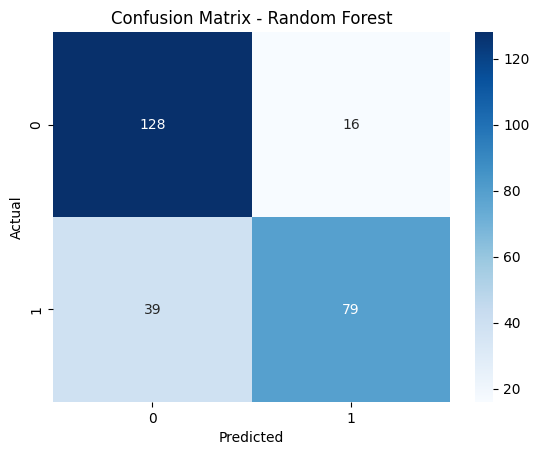

In [92]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, rf_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()


In [93]:
model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

model.fit(X_train, y_train)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [94]:
import os
print(os.getcwd())
os.listdir()


d:\Python\python_darslari\AI\machine_learning


['model_columns.pkl',
 'random_forest_model.pkl',
 'scaler.pkl',
 'titanic.csv',
 'titanic.ipynb',
 'titanic_example.ipynb']

In [95]:
import joblib

joblib.dump(model, "random_forest_model.pkl")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

In [96]:
import joblib

model = joblib.load("random_forest_model.pkl")
scaler = joblib.load("scaler.pkl")
joblib.dump(X_train.columns.tolist(), "model_columns.pkl")


['model_columns.pkl']

In [ ]:
# print(sample_df.columns.tolist())



['pclass', 'age', 'sibsp', 'parch', 'fare', 'sex_male', 'embarked_Q', 'embarked_S', 'home.dest_Aberdeen / Portland, OR', 'home.dest_Albany, NY', 'home.dest_Altdorf, Switzerland', 'home.dest_Amenia, ND', 'home.dest_Antwerp, Belgium / Stanton, OH', 'home.dest_Argentina', 'home.dest_Asarum, Sweden Brooklyn, NY', 'home.dest_Ascot, Berkshire / Rochester, NY', 'home.dest_Auburn, NY', 'home.dest_Aughnacliff, Co Longford, Ireland New York, NY', 'home.dest_Australia Fingal, ND', 'home.dest_Austria', 'home.dest_Austria Niagara Falls, NY', 'home.dest_Austria-Hungary', 'home.dest_Austria-Hungary / Germantown, Philadelphia, PA', 'home.dest_Bangkok, Thailand / Roseville, IL', 'home.dest_Barcelona, Spain / Havana, Cuba', 'home.dest_Barre, Co Washington, VT', 'home.dest_Basel, Switzerland', 'home.dest_Bath, England / Massachusetts', 'home.dest_Bayside, Queens, NY', 'home.dest_Belfast', 'home.dest_Belfast, NI', 'home.dest_Belgium  Montreal, PQ', 'home.dest_Belgium Detroit, MI', 'home.dest_Belmont, MA',

In [1]:
# model_columns = joblib.load("model_columns.pkl")
# # Sample passenger
# sample_passenger = {
#     "Pclass": 3,
#     "Sex": "male",
#     "Age": 22,
#     "SibSp": 1,
#     "Parch": 0,
#     "Fare": 7.25,
#     "Embarked": "S"
# }

# sample_df = pd.DataFrame([sample_passenger])

# # One-hot encoding
# sample_df = pd.get_dummies(sample_df)

# # Missing columns
# for col in model_columns:
#     if col not in sample_df.columns:
#         sample_df[col] = 0

# # Correct column order
# sample_df = sample_df[model_columns]

# # Scale numeric features
# numeric_features = ["Age", "Fare", "SibSp", "Parch"]
# sample_df[numeric_features] = scaler.transform(sample_df[numeric_features])

# # Predict
# prediction = model.predict(sample_df)
# probability = model.predict_proba(sample_df)

# print("Survived:", "YES" if prediction[0] == 1 else "NO")
# print("Probability:", probability)
